<a href="https://colab.research.google.com/github/Bourbon4ik/ML_Assignment2/blob/main/ml_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

#Alan Zoltan 6359
#Zoe Petropouliadis 4457
#Elizabeth Nikolaev 1740
#Leon Yurkovski 2357
#Nitzan Levy 1596

In [ ]:
def best_data_trainer_gridsearch(train_data, test_data, target_column, scaler_num, model_num, exclude_columns = None):

    # Split features and target
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]
    X_test = test_data.drop(columns=[target_column])
    y_test = test_data[target_column]
    if exclude_columns != None:
        columns_to_scale = [col for col in X_train.columns if col not in exclude_columns]
    else:
        columns_to_scale = [col for col in X_train.columns]
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Feature scaling
    if scaler_num == 'standard':
        scaler = StandardScaler()
        print('Standard Scaler')
        X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
        X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    elif scaler_num == 'minmax':
        scaler = MinMaxScaler()
        print('MinMax Scaler')
        X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
        X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

    elif scaler_num == 'none':
        print('No Scaler')

    # Applying model
    if model_num == 'tree':
        model = DecisionTreeRegressor(random_state = 42)
        param_grid = {
            'max_depth': [15, 16, 17, 18],
            'min_samples_split': [2, 3],
            'min_samples_leaf': [15, 16, 17] }
        print('Decision Tree Regressor')

    elif model_num == 'ridge':
        model = Ridge()
        param_grid = {
            'alpha': [0.09, 0.1, 0.15, 3.5, 3.75, 4, 4.1],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']}
        print('Ridge Regressor')

    elif model_num == 'lasso':
        model = Lasso()
        param_grid = {
            'alpha': [0.0001, 0.0009, 0.001, 0.002, 0.003],
            'max_iter': [100, 1000, 10000]}
        print('Lasso Regressor')

    # Initialize and perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)

    # Check the best hyperparameters
    print(f"Best Parameters: {grid_search.best_params_}")

    # Make predictions with the best model
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_scaled)
    y_test_pred = best_model.predict(X_test_scaled)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}")
    print(f"--------------------------------------------------------------------------")

    results = {
        'model': model.__class__.__name__,
        'scaler': scaler.__class__.__name__ if scaler_num != 'none' else 'No Scaler',
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'best_params': grid_search.best_params_
    }

    return results

In [ ]:
#Loading the Dataset
train_data = pd.read_csv('housing_train.csv')
test_data = pd.read_csv('housing_test.csv')
train_df = train_data.copy()
test_df = test_data.copy()

In [ ]:
# First 5 Rows of the Data
print("First 5 Rows of the Data")
print(train_df.head().to_markdown(index=False, numalign="left", stralign="left"))
descriptive_stats_table = train_df.describe()

First 5 Rows of the Data
| MedInc   | HouseAge   | AveRooms   | AveBedrms   | Population   | AveOccup   | Latitude   | Longitude   | MedHouseVal   |
|:---------|:-----------|:-----------|:------------|:-------------|:-----------|:-----------|:------------|:--------------|
| 4.0179   | 46         | 4.15869    | 1.03275     | 512          | 1.28967    | 34.07      | -118.35     | 3.5           |
| 2.7002   | 6          | 4.14925    | 1.17999     | 4092         | 2.28731    | 34.05      | -117.31     | 0.883         |
| 1.2762   | 17         | 3.43233    | 1.02256     | 1325         | 2.4906     | 34.42      | -119.69     | 2.536         |
| 4.9342   | 23         | 5.7358     | 1.0532      | 4580         | 4.12985    | 34.04      | -117.93     | 1.81          |
| 2.2755   | 21         | 4.06461    | 0.962079    | 2109         | 2.96208    | 32.58      | -117.11     | 1.25          |


In [ ]:
# Building statistics of the data
print("Descriptive Statistics of Numerical Variables:")
print(descriptive_stats_table.to_markdown(numalign="left", stralign="left"))
train_df['AveBedrms_binned'] = pd.cut(train_df['AveBedrms'], bins=[0, 1, 2, 3, 4, float('inf')], labels=['0-1', '1-2', '2-3', '3-4', '4+'])

Descriptive Statistics of Numerical Variables:
|       | MedInc   | HouseAge   | AveRooms   | AveBedrms   | Population   | AveOccup   | Latitude   | Longitude   | MedHouseVal   |
|:------|:---------|:-----------|:-----------|:------------|:-------------|:-----------|:-----------|:------------|:--------------|
| count | 16512    | 16512      | 16512      | 16512       | 16512        | 16512      | 16512      | 16512       | 16512         |
| mean  | 3.86352  | 28.6507    | 5.41248    | 1.09355     | 1424.29      | 3.1012     | 35.6315    | -119.566    | 2.06527       |
| std   | 1.87858  | 12.624     | 2.08868    | 0.378594    | 1139.01      | 11.5878    | 2.13754    | 2.00655     | 1.15122       |
| min   | 0.4999   | 1          | 0.846154   | 0.333333    | 3            | 0.692308   | 32.54      | -124.35     | 0.14999       |
| 25%   | 2.56438  | 18         | 4.44866    | 1.00599     | 789          | 2.43107    | 33.93      | -121.8      | 1.192         |
| 50%   | 3.53665  | 29      

In [ ]:
# Calculate mean MedHouseVal by AveBedrms_binned
mean_house_value_by_bedrooms = train_df.groupby('AveBedrms_binned')['MedHouseVal'].mean()

print("\nAverage Median House Value by Number of Bedrooms:")
print(mean_house_value_by_bedrooms.to_markdown(numalign="left", stralign="left"))


Average Median House Value by Number of Bedrooms:
| AveBedrms_binned   | MedHouseVal   |
|:-------------------|:--------------|
| 0-1                | 2.13705       |
| 1-2                | 2.05315       |
| 2-3                | 1.37499       |
| 3-4                | 1.57146       |
| 4+                 | 1.5061        |


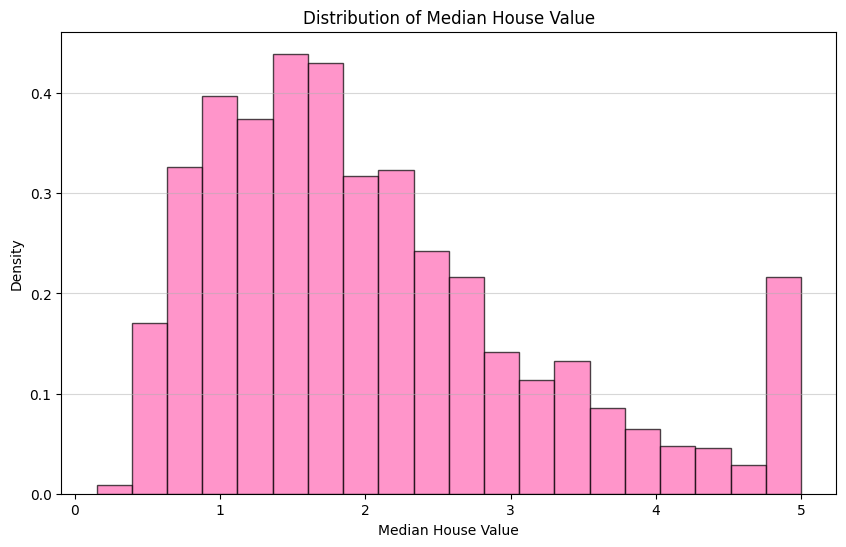

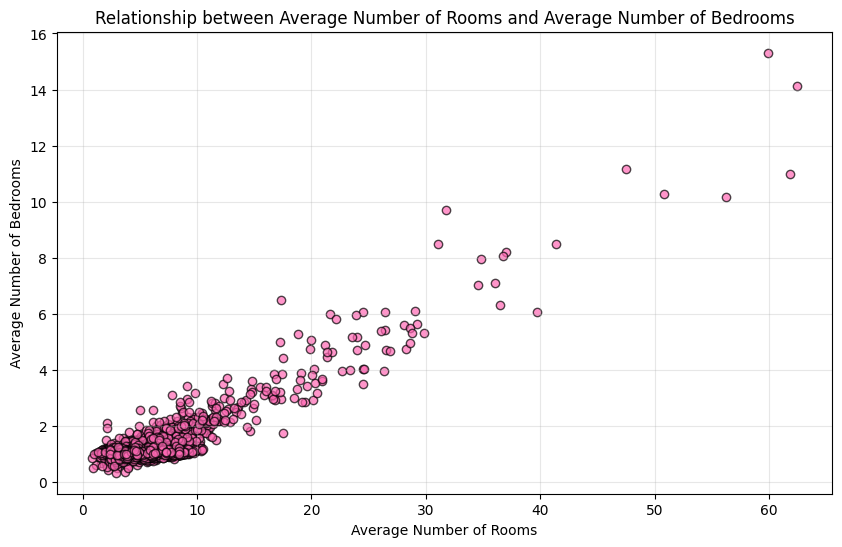

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(train_df['MedHouseVal'], bins=20, density=True, alpha=0.7, color='hotpink', edgecolor='black')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.5)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(train_df['AveRooms'], train_df['AveBedrms'], alpha=0.7, color='hotpink', edgecolor='black')
plt.title('Relationship between Average Number of Rooms and Average Number of Bedrooms')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Average Number of Bedrooms')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
print(train_df[['AveBedrms','AveRooms']].corr())
train_df = train_df.drop(['AveBedrms_binned'], axis = 1)

           AveBedrms  AveRooms
AveBedrms   1.000000  0.790688
AveRooms    0.790688  1.000000


In [ ]:
# Test with dropping the Latitude and Longitude
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
train_df_copy = train_df_copy.drop(['AveBedrms', 'Latitude', 'Longitude'], axis=1)
test_df_copy = test_df_copy.drop(['AveBedrms', 'Latitude', 'Longitude'], axis=1)
scalers, models = ['standard', 'minmax', 'none'], ['tree', 'ridge', 'lasso']
results_list_no_coords = []

# Checking every single combination to find the best
for model_num in models:
    for scaler_num in scalers:
        results_list_no_coords.append(best_data_trainer_gridsearch(train_df_copy, test_df_copy,'MedHouseVal', scaler_num, model_num))



Standard Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2}
Train MSE: 0.33741824287213706
Test MSE: 0.46938443612237024
Train R-squared: 0.7453880448653898
Test R-squared: 0.6540078322584233
--------------------------------------------------------------------------
MinMax Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2}
Train MSE: 0.3375010247766861
Test MSE: 0.46939517524084395
Train R-squared: 0.7453255785850026
Test R-squared: 0.6539999162505747
--------------------------------------------------------------------------
No Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2}
Train MSE: 0.33741824287213706
Test MSE: 0.46938443612237024
Train R-squared: 0.7453880448653898
Test R-squared: 0.6540078322584233
--------------------------------------------------------------------------
Standard Scaler
Rid

In [ ]:
# Test without dropping the Latitude and Longitude
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()
train_df_copy = train_df_copy.drop(['AveBedrms'], axis=1)
test_df_copy = test_df_copy.drop(['AveBedrms'], axis=1)
exclude_columns = ['Latitude', 'Longitude']
scalers, models = ['standard', 'minmax', 'none'], ['tree', 'ridge', 'lasso']
results_list_coords = []

# Checking every single combination to find the best
for model_num in models:
    for scaler_num in scalers:
        results_list_coords.append(best_data_trainer_gridsearch(train_df_copy, test_df_copy,'MedHouseVal', scaler_num, model_num, exclude_columns))

Standard Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 2}
Train MSE: 0.24138594035996447
Test MSE: 0.3534623645991914
Train R-squared: 0.8178529243294447
Test R-squared: 0.7394561891462994
--------------------------------------------------------------------------
MinMax Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 17, 'min_samples_leaf': 16, 'min_samples_split': 2}
Train MSE: 0.24183796518588274
Test MSE: 0.35250813642837836
Train R-squared: 0.8175118315547424
Test R-squared: 0.7401595688238769
--------------------------------------------------------------------------
No Scaler
Decision Tree Regressor
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 2}
Train MSE: 0.24138594035996447
Test MSE: 0.3534623645991914
Train R-squared: 0.8178529243294447
Test R-squared: 0.7394561891462994
--------------------------------------------------------------------------
Standard Scaler
Ridg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e+00, tolerance: 2.188e+00
  model = cd_fast.enet_coordinate_descent(


Best Parameters: {'alpha': 0.0001, 'max_iter': 100}
Train MSE: 0.538481768467999
Test MSE: 0.5362197327656573
Train R-squared: 0.5936678031782219
Test R-squared: 0.6047422678560417
--------------------------------------------------------------------------
No Scaler
Lasso Regressor
Best Parameters: {'alpha': 0.0001, 'max_iter': 1000}
Train MSE: 0.5383529360836876
Test MSE: 0.5355177157638895
Train R-squared: 0.593765018625066
Test R-squared: 0.6052597378988058
--------------------------------------------------------------------------


In [ ]:
#Summarize results into a DataFrame

all_results = results_list_no_coords + results_list_coords
results_df = pd.DataFrame(all_results)
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))

| model                 | scaler         | train_mse   | test_mse   | train_r2   | test_r2   | best_params                                                       |
|:----------------------|:---------------|:------------|:-----------|:-----------|:----------|:------------------------------------------------------------------|
| DecisionTreeRegressor | StandardScaler | 0.337418    | 0.469384   | 0.745388   | 0.654008  | {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2} |
| DecisionTreeRegressor | MinMaxScaler   | 0.337501    | 0.469395   | 0.745326   | 0.654     | {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2} |
| DecisionTreeRegressor | No Scaler      | 0.337418    | 0.469384   | 0.745388   | 0.654008  | {'max_depth': 15, 'min_samples_leaf': 17, 'min_samples_split': 2} |
| Ridge                 | StandardScaler | 0.642596    | 0.672094   | 0.515105   | 0.504587  | {'alpha': 3.75, 'solver': 'sag'}                                  |
| Ridge               

In [ ]:
#compare which model is the best one
def compare_models(results):
    best_model = None
    best_r2 = -float('inf')

    for result in results:
        if (result['test_r2'] > best_r2) or (result['test_r2'] == best_r2):
            best_model = result['model']
            best_r2 = result['test_r2']
            best_scaler = result['scaler']
            best_params = result['best_params']
    return best_model, best_scaler, best_params


In [ ]:
#retrain with the best model chosen
def retrain_best_model(train_data, target_column, best_scaler_name, best_model_name, best_params, exclude_columns=None):
    X_train = train_data.drop(columns=[target_column])
    y_train = train_data[target_column]

    if exclude_columns is not None:
        columns_to_scale = [col for col in X_train.columns if col not in exclude_columns]
    else:
        columns_to_scale = [col for col in X_train.columns]

    X_train_scaled = X_train.copy()

    #apply the best scaler
    if best_scaler_name == 'StandardScaler':
        scaler = StandardScaler()
        X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    elif best_scaler_name == 'MinMaxScaler':
        scaler = MinMaxScaler()
        X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
    elif best_scaler_name == 'No Scaler':
        scaler = None

    #apply the best model
    if best_model_name == 'DecisionTreeRegressor':
        model = DecisionTreeRegressor(**best_params)
    elif best_model_name == 'Ridge':
        model = Ridge(**best_params)
    elif best_model_name == 'Lasso':
        model = Lasso(**best_params)

    #train the model on the scaled training data
    model.fit(X_train_scaled, y_train)

    return X_train_scaled, y_train, model


In [ ]:
#retrain the best model on the entire training data
best_model, best_scaler, best_params = compare_models(all_results)
X_retrained, y_retrained, model = retrain_best_model(train_df, 'MedHouseVal', best_scaler, best_model, best_params, exclude_columns)
y_train_pred = model.predict(X_retrained)
train_mse = mean_squared_error(y_retrained, y_train_pred)
train_r2 = r2_score(y_retrained, y_train_pred)
print("Retrained Best Model:")
print(best_model, best_scaler)
print(f"Train MSE: {train_mse}")
print(f"Train R-squared: {train_r2}")

Retrained Best Model:
DecisionTreeRegressor MinMaxScaler
Train MSE: 0.23894053385505698
Train R-squared: 0.8196982001687517


In [ ]:
# separate 'MedHouseVal' from test data for comparison
X_test, y_test, model = retrain_best_model(test_df, 'MedHouseVal', best_scaler, best_model, best_params, exclude_columns)

# predict 'MedHouseVal' using the retrained best model
y_test_pred = model.predict(X_test)

# compare predictions with actual values
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")


Test MSE: 0.27696520659958884
Test R-squared: 0.7958436947504524
